In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rcParams
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)


rcParams['axes.unicode_minus'] = False
pd.options.display.float_format = '{:.0f}'.format

In [3]:
pop1904 = pd.read_csv('2020 금융 빅데이터 챌린지-공모전데이터/케이티/유동인구일집계_201904.csv', encoding = 'cp949')
pop1905 = pd.read_csv('2020 금융 빅데이터 챌린지-공모전데이터/케이티/유동인구일집계_201905.csv', encoding = 'cp949')
pop2004 = pd.read_csv('2020 금융 빅데이터 챌린지-공모전데이터/케이티/유동인구일집계_202004.csv', encoding = 'cp949')
pop2005 = pd.read_csv('2020 금융 빅데이터 챌린지-공모전데이터/케이티/유동인구일집계_202005.csv', encoding = 'cp949')

In [4]:
print(pop1904.shape)
print(pop1905.shape)
print(pop2004.shape)
print(pop2005.shape)

(335267, 6)
(346627, 6)
(411684, 6)
(356858, 6)


In [5]:
pop1904.head(10)

,기준일자,24시간코드,성별코드,연령대구분값,행정동번호,인구수
0,20190401,0,M,age_65,11110710,37
1,20190401,1,F,age_35,11110700,61
2,20190401,5,F,age_45,11110580,58
3,20190401,7,F,age_55,11110550,137
4,20190401,8,M,age_70,11110700,66
5,20190401,16,F,age_20,11110615,1453
6,20190401,17,M,age_45,11110570,132
7,20190401,18,F,age_15,11110560,113
8,20190401,19,M,age_30,11110710,266
9,20190401,19,M,age_55,11110540,57


In [7]:
pop_info = pd.read_csv('2020 금융 빅데이터 챌린지-공모전데이터/케이티/행정동정보.csv', encoding = 'cp949')

In [8]:
pop_info

,기준일자,행정동코드,행정동명,광역시도명,시군구명
0,20200106,11110650,혜화동,서울특별시,종로구
1,20200106,11110680,창신2동,서울특별시,종로구
2,20200106,11110580,교남동,서울특별시,종로구
3,20200106,11110710,숭인2동,서울특별시,종로구
4,20200106,11110700,숭인1동,서울특별시,종로구
5,20200106,11110640,이화동,서울특별시,종로구
6,20200106,11110600,가회동,서울특별시,종로구
7,20200106,11110560,평창동,서울특별시,종로구
8,20200106,11110615,종로1.2.3.4가동,서울특별시,종로구
9,20200106,11110540,삼청동,서울특별시,종로구


In [9]:
df_pop = pd.concat([pop1904, pop1905, pop2004, pop2005], axis = 0)
df_pop.head(5)

,기준일자,24시간코드,성별코드,연령대구분값,행정동번호,인구수
0,20190401,0,M,age_65,11110710,37
1,20190401,1,F,age_35,11110700,61
2,20190401,5,F,age_45,11110580,58
3,20190401,7,F,age_55,11110550,137
4,20190401,8,M,age_70,11110700,66


In [10]:
df_pop.index = range(len(df_pop))

In [11]:
df_pop['24시간코드'].unique() # 0~23까지 한 시간 간격으로 있음

array([ 0,  1,  5,  7,  8, 16, 17, 18, 19, 20,  3,  6, 12, 14, 21, 22, 23,
        4,  9, 11, 13, 15,  2, 10], dtype=int64)

In [12]:
df_pop['24시간코드'].value_counts()

16    61757
15    61731
14    61720
17    61690
18    61654
13    61590
19    61487
12    61407
20    61345
11    61267
9     61203
21    61177
10    61162
0     61115
8     60978
22    60786
23    60053
7     60023
1     58702
2     58469
6     58391
5     58200
3     57334
4     57195
Name: 24시간코드, dtype: int64

In [13]:
df_pop.describe(include = 'all')

,기준일자,24시간코드,성별코드,연령대구분값,행정동번호,인구수
count,1450436,1450436,1450436,1450436,1450436,1450436
unique,nan,nan,2,14,nan,nan
top,nan,nan,F,age_30,nan,nan
freq,nan,nan,725619,106077,nan,nan
mean,20195763,12,NaN,NaN,11110614,152
std,4989,7,NaN,NaN,62,240
min,20190401,0,NaN,NaN,11110515,1
25%,20190503,6,NaN,NaN,11110560,24
50%,20200404,12,NaN,NaN,11110615,73
75%,20200430,18,NaN,NaN,11110670,189


In [14]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450436 entries, 0 to 1450435
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   기준일자    1450436 non-null  int64 
 1   24시간코드  1450436 non-null  int64 
 2   성별코드    1450436 non-null  object
 3   연령대구분값  1450436 non-null  object
 4   행정동번호   1450436 non-null  int64 
 5   인구수     1450436 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 66.4+ MB


In [15]:
df_pop

,기준일자,24시간코드,성별코드,연령대구분값,행정동번호,인구수
0,20190401,0,M,age_65,11110710,37
1,20190401,1,F,age_35,11110700,61
2,20190401,5,F,age_45,11110580,58
3,20190401,7,F,age_55,11110550,137
4,20190401,8,M,age_70,11110700,66
...,...,...,...,...,...,...
1450431,20200527,18,F,age_45,11110515,229
1450432,20200527,18,F,age_35,11110615,1619
1450433,20200527,18,F,age_30,11110515,245
1450434,20200527,18,F,age_20,11110615,2143


In [16]:
def datesep(x):
    x = str(x)
    y = f"{x[:4]}, {x[4:6]}, {x[6:]}"
    return y

In [17]:
df_pop['날짜'] = df_pop['기준일자'].apply(datesep)

In [18]:
df_pop['날짜'] = pd.to_datetime(df_pop['날짜']) # datetime으로 형변환

In [19]:
df_pop.drop('기준일자', axis = 1, inplace = True) # 기준일자 컬럼 삭제

In [20]:
df_pop

,24시간코드,성별코드,연령대구분값,행정동번호,인구수,날짜
0,0,M,age_65,11110710,37,2019-04-01
1,1,F,age_35,11110700,61,2019-04-01
2,5,F,age_45,11110580,58,2019-04-01
3,7,F,age_55,11110550,137,2019-04-01
4,8,M,age_70,11110700,66,2019-04-01
...,...,...,...,...,...,...
1450431,18,F,age_45,11110515,229,2020-05-27
1450432,18,F,age_35,11110615,1619,2020-05-27
1450433,18,F,age_30,11110515,245,2020-05-27
1450434,18,F,age_20,11110615,2143,2020-05-27


In [21]:
def printday(date):
    d = ['월', '화', '수', '목', '금', '토', '일']
    return d[date.weekday()]

In [22]:
df_pop['요일'] = df_pop['날짜'].apply(printday)  # 요일 컬럼을 넣어줬다

In [23]:
df_pop['요일']

0          월
1          월
2          월
3          월
4          월
          ..
1450431    수
1450432    수
1450433    수
1450434    수
1450435    수
Name: 요일, Length: 1450436, dtype: object

In [24]:
df_pop['연령대구분값'].value_counts() # 0~70세까지 5세 단위로 있는듯. 아마 10세 이하, 70세 이상 으로 구분한거 같음

age_30    106077
age_35    106071
age_25    106068
age_20    106067
age_55    106062
age_50    106061
age_45    106051
age_40    106050
age_60    106032
age_70    105982
age_65    105883
age_15    105477
age_10     98958
age_00     79597
Name: 연령대구분값, dtype: int64

In [25]:
def year(x):
    return x.year
def month(x):
    return x.month
def day(x):
    return x.day

In [26]:
df_pop['년'] = df_pop['날짜'].apply(year)
df_pop['월'] = df_pop['날짜'].apply(month)
df_pop['일'] = df_pop['날짜'].apply(day)

In [27]:
df_pop

,24시간코드,성별코드,연령대구분값,행정동번호,인구수,날짜,요일,년,월,일
0,0,M,age_65,11110710,37,2019-04-01,월,2019,4,1
1,1,F,age_35,11110700,61,2019-04-01,월,2019,4,1
2,5,F,age_45,11110580,58,2019-04-01,월,2019,4,1
3,7,F,age_55,11110550,137,2019-04-01,월,2019,4,1
4,8,M,age_70,11110700,66,2019-04-01,월,2019,4,1
...,...,...,...,...,...,...,...,...,...,...
1450431,18,F,age_45,11110515,229,2020-05-27,수,2020,5,27
1450432,18,F,age_35,11110615,1619,2020-05-27,수,2020,5,27
1450433,18,F,age_30,11110515,245,2020-05-27,수,2020,5,27
1450434,18,F,age_20,11110615,2143,2020-05-27,수,2020,5,27


# 년/ 행정동번호(지역)에 따른 인구수를 구분해보자

In [28]:
df_year_admin = df_pop.groupby(['년','행정동번호'], as_index = False)['인구수'].mean()
df_year_admin

,년,행정동번호,인구수
0,2019,11110515,131
1,2019,11110530,311
2,2019,11110540,44
3,2019,11110550,126
4,2019,11110560,160
5,2019,11110570,70
6,2019,11110580,132
7,2019,11110600,88
8,2019,11110615,593
9,2019,11110630,236


In [29]:
df_year_admin19 = df_year_admin[:17]
df_year_admin20 = df_year_admin[17:]
df_year_admin2 = pd.merge(df_year_admin19, df_year_admin20, on= '행정동번호')

In [30]:
df_year_admin2.head(3)

,년_x,행정동번호,인구수_x,년_y,인구수_y
0,2019,11110515,131,2020,95
1,2019,11110530,311,2020,262
2,2019,11110540,44,2020,51


In [31]:
df_year_admin2

,년_x,행정동번호,인구수_x,년_y,인구수_y
0,2019,11110515,131,2020,95
1,2019,11110530,311,2020,262
2,2019,11110540,44,2020,51
3,2019,11110550,126,2020,132
4,2019,11110560,160,2020,145
5,2019,11110570,70,2020,62
6,2019,11110580,132,2020,114
7,2019,11110600,88,2020,72
8,2019,11110615,593,2020,555
9,2019,11110630,236,2020,211


In [32]:
def plusminus(x, y):
    return (y-x)/x * 100
df_year_admin2['증감률'] = ''
for i in range(len(df_year_admin2)):
    x = df_year_admin2.loc[i,'인구수_x']
    y = df_year_admin2.loc[i, '인구수_y']
    
    z = plusminus(x,y)
    df_year_admin2['증감률'][i] = z

<ipython-input-32-fd23cb1e5514>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_admin2['증감률'][i] = z


In [33]:
df_year_admin2

,년_x,행정동번호,인구수_x,년_y,인구수_y,증감률
0,2019,11110515,131,2020,95,-27
1,2019,11110530,311,2020,262,-16
2,2019,11110540,44,2020,51,17
3,2019,11110550,126,2020,132,5
4,2019,11110560,160,2020,145,-9
5,2019,11110570,70,2020,62,-12
6,2019,11110580,132,2020,114,-14
7,2019,11110600,88,2020,72,-18
8,2019,11110615,593,2020,555,-6
9,2019,11110630,236,2020,211,-11


In [34]:
df_year_admin2.columns = ['년_x', '행정동코드', '인구수_x', '년_y', '인구수_y', '증감률']

In [35]:
df_year_admin2 = pd.merge(df_year_admin2, pop_info, on = '행정동코드')

In [36]:
df_year_admin2.drop(['기준일자', '광역시도명', '시군구명'], axis = 1, inplace = True)

In [37]:
df_year_admin2 = df_year_admin2[[ '행정동명', '행정동코드', '년_x', '인구수_x', '년_y', '인구수_y', '증감률' ]]

In [38]:
def graph(data, name, x, y): # xlabel : 성별, 연령대 등/ ylabel : 증감률
    xlabel = data[x]
    ylabel = data[y]
    plt.figure(figsize = (12,5))
    colors = ['red' if (y<0) else 'blue' for y in ylabel] # 0 미만이면 빨강, 0 이상이면 파랑
    plt.bar(range(len(data)), ylabel, color = colors, alpha = 0.5)
    ax = plt.subplot()
    ax.set_xticks(range(len(data)))
    ax.set_xticklabels(xlabel, rotation = 30, fontsize = 12)
    ax.set_yticks([40, 20,0,-20, -40])
    ax.set_yticklabels([40, 20, 0, -20, -40], fontsize = 12)
    plt.axhline( y = 0, color = 'black')
    plt.title(name, fontsize = 20)
    plt.grid(axis = 'y', alpha = 0.7)
    plt.show()

In [39]:
df_year_admin2

,행정동명,행정동코드,년_x,인구수_x,년_y,인구수_y,증감률
0,청운효자동,11110515,2019,131,2020,95,-27
1,사직동,11110530,2019,311,2020,262,-16
2,삼청동,11110540,2019,44,2020,51,17
3,부암동,11110550,2019,126,2020,132,5
4,평창동,11110560,2019,160,2020,145,-9
5,무악동,11110570,2019,70,2020,62,-12
6,교남동,11110580,2019,132,2020,114,-14
7,가회동,11110600,2019,88,2020,72,-18
8,종로1.2.3.4가동,11110615,2019,593,2020,555,-6
9,종로5.6가동,11110630,2019,236,2020,211,-11


In [38]:
a = df_year_admin2['인구수_x'].sum()
b = df_year_admin2['인구수_y'].sum()
(b-a)/a*100 # 전년대비 8.7프로 감소

-8.716928265371143

In [39]:
df_year_admin2['증감률'] = df_year_admin2['증감률'].astype(int)

In [40]:
df_year_admin2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 0 to 16
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   행정동명    17 non-null     object 
 1   행정동코드   17 non-null     int64  
 2   년_x     17 non-null     int64  
 3   인구수_x   17 non-null     float64
 4   년_y     17 non-null     int64  
 5   인구수_y   17 non-null     float64
 6   증감률     17 non-null     int32  
dtypes: float64(2), int32(1), int64(3), object(1)
memory usage: 1020.0+ bytes


### 다시 raw 데이터에서 성별, 연령대별, 요일별로도 해보자

In [41]:
df_pop.head(5)

,24시간코드,성별코드,연령대구분값,행정동번호,인구수,날짜,요일,년,월,일
0,0,M,age_65,11110710,37,2019-04-01,월,2019,4,1
1,1,F,age_35,11110700,61,2019-04-01,월,2019,4,1
2,5,F,age_45,11110580,58,2019-04-01,월,2019,4,1
3,7,F,age_55,11110550,137,2019-04-01,월,2019,4,1
4,8,M,age_70,11110700,66,2019-04-01,월,2019,4,1


In [42]:
df_pop.groupby(['년', '요일'], as_index = False).agg({'인구수' :  ['sum', 'count', 'mean']})

년 요일       인구수             
                  sum   count mean
0   2019  금  17380678  100665  173
1   2019  목  16996371  100468  169
2   2019  수  16917882  100540  168
3   2019  월  15817659  100356  158
4   2019  일  10873786   89477  122
5   2019  토  13931260   89915  155
6   2019  화  16899456  100473  168
7   2020  금  19298709  122524  158
8   2020  목  19314305  122456  158
9   2020  수  21099752  133572  158
10  2020  월  15424639  100172  154
11  2020  일  10269360  100209  102
12  2020  토  12910017  100529  128
13  2020  화  13750143   89080  154

In [43]:
df_day_pop19 = df_pop.groupby(['년', '요일'], as_index = False)['인구수'].mean()[:7]
df_day_pop20 = df_pop.groupby(['년', '요일'], as_index = False)['인구수'].mean()[7:]
df_day_pop = pd.merge(df_day_pop19,df_day_pop20, on = '요일')
df_day_pop

,년_x,요일,인구수_x,년_y,인구수_y
0,2019,금,173,2020,158
1,2019,목,169,2020,158
2,2019,수,168,2020,158
3,2019,월,158,2020,154
4,2019,일,122,2020,102
5,2019,토,155,2020,128
6,2019,화,168,2020,154


In [44]:
df_day_pop['증감률'] = ''
for i in range(len(df_day_pop)):
    x = df_day_pop['인구수_x'][i]
    y = df_day_pop['인구수_y'][i]
    z = (y-x)/x*100
    df_day_pop['증감률'][i] = z

<ipython-input-44-77e0a1d6f299>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day_pop['증감률'][i] = z


# 년/요일

In [45]:
df_day_pop # 토욜, 일욜 인구가 확실히 많이 줄어들었다.

,년_x,요일,인구수_x,년_y,인구수_y,증감률
0,2019,금,173,2020,158,-9
1,2019,목,169,2020,158,-7
2,2019,수,168,2020,158,-6
3,2019,월,158,2020,154,-2
4,2019,일,122,2020,102,-16
5,2019,토,155,2020,128,-17
6,2019,화,168,2020,154,-8


<ipython-input-36-5ce47ed02fa8>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


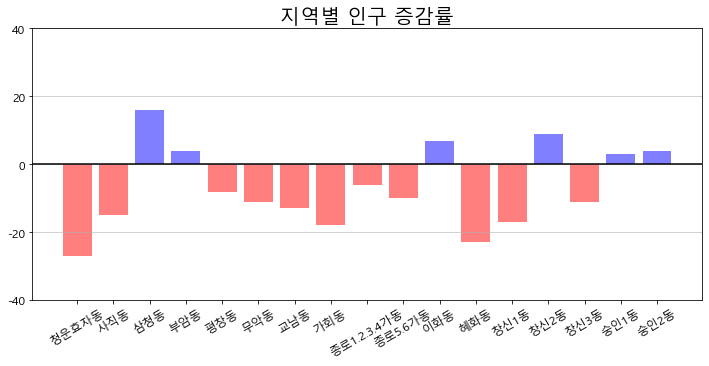

In [46]:
graph(df_year_admin2, '지역별 인구 증감률', '행정동명', '증감률')

### 위기 : ['청운효자동', '혜화동', '가회동', '창신1동', '사직동']
### 시작 : ['삼청동', '창신2동', '이화동', '숭인2동', '부암동']

In [47]:
pop_code_dict = dict() # 지역명 : 코드 하는 딕셔너리
for i in range(len(pop_info)):
    pop_code_dict[pop_info['행정동명'][i]] = pop_info['행정동코드'][i]

In [48]:
def givegroup(name, standard_list, agg_dict, merge):
    num = pop_code_dict[name]
    x = df_pop[df_pop['행정동번호'] == num].copy()
    y = x.groupby(standard_list, as_index = False).agg(agg_dict)
    
    y_1 = y.loc[:len(y)/2-1]
    y_2 = y.loc[len(y)/2:]
    y_union = pd.merge(y_1, y_2, on = merge)
    
    y_union['증감률'] = '' # 증감률 컬럼 추가
    for j in range(len(y_union)):
        a = y_union['인구수_x'][j]
        b = y_union['인구수_y'][j]
        c = (b-a)/a*100
        y_union['증감률'][j] = c
    return y_union

In [49]:
crisis_list = []
for name in ['청운효자동', '혜화동', '가회동', '창신1동', '사직동']:
    crisis_list.append(df_year_admin2[df_year_admin2['행정동명'] == name]['행정동코드'])
begin_list = []
for name in ['삼청동', '창신2동', '이화동', '숭인2동', '부암동']:
    begin_list.append(df_year_admin2[df_year_admin2['행정동명'] == name]['행정동코드'])

In [50]:
standard_list = ['년', '연령대구분값']
agg_dict = {'인구수' : 'mean'}
merge = ['연령대구분값']

crisis1 = givegroup('청운효자동', standard_list, agg_dict, merge)
crisis2 = givegroup('혜화동', standard_list, agg_dict, merge)
crisis3 = givegroup('가회동', standard_list, agg_dict, merge)
crisis4 = givegroup('창신1동', standard_list, agg_dict, merge)
crisis5 = givegroup('사직동', standard_list, agg_dict, merge)

begin1 = givegroup('삼청동', standard_list, agg_dict, merge)
begin2 = givegroup('창신2동', standard_list, agg_dict, merge)
begin3 = givegroup('이화동', standard_list, agg_dict, merge)
begin4 = givegroup('숭인2동', standard_list, agg_dict, merge)
begin5 = givegroup('부암동', standard_list, agg_dict, merge)

<ipython-input-48-e863905ef29d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_union['증감률'][j] = c


In [51]:
# with pd.ExcelWriter('동별 상위10 하위10 연령대,성별 인구증감률.xlsx') as writer:
#     crisis1.to_excel(writer, sheet_name = '청운효자동')
#     crisis1_2.to_excel(writer, sheet_name = '청운효자동 성별연령대별')
#     crisis2.to_excel(writer, sheet_name = '혜화동')
#     crisis2_2.to_excel(writer, sheet_name = '혜화동 성별연령대별')
#     crisis3.to_excel(writer, sheet_name = '가회동')
#     crisis3_2.to_excel(writer, sheet_name = '가회동 성별연령대별')
#     crisis4.to_excel(writer, sheet_name = '창신1동')
#     crisis4_2.to_excel(writer, sheet_name = '창신1동 성별연령대별')
#     crisis5.to_excel(writer, sheet_name = '사직동')
#     crisis5_2.to_excel(writer, sheet_name = '사직동 성별연령대별')
#     begin1.to_excel(writer, sheet_name = '삼청동')
#     begin1_2.to_excel(writer, sheet_name = '삼청동 성별연령대별')
#     begin2.to_excel(writer, sheet_name = '창신2동')
#     begin2_2.to_excel(writer, sheet_name = '창신2동 성별연령대별')
#     begin3.to_excel(writer, sheet_name = '이화동')
#     begin3_2.to_excel(writer, sheet_name = '이화동 성별연령대별')
#     begin4.to_excel(writer, sheet_name = '숭인2동')
#     begin4_2.to_excel(writer, sheet_name = '숭인2동 성별연령대별')
#     begin5.to_excel(writer, sheet_name = '부암동')
#     begin5_2.to_excel(writer, sheet_name = '부암동 성별연령대별')
    

#### 단일 바 그래프. 

In [127]:
def graph(data, name, x, y): # xlabel : 성별, 연령대 등/ ylabel : 증감률
    xlabel = data[x]
    ylabel = data[y]
    plt.figure(figsize = (12,5))
    colors = ['red' if (y<0) else 'blue' for y in ylabel] # 0 미만이면 빨강, 0 이상이면 파랑
    plt.bar(range(len(data)), ylabel, color = colors, alpha = 0.5)
    ax = plt.subplot()
    ax.set_xticks(range(len(data)))
    ax.set_xticklabels(xlabel, rotation = 30, fontsize = 12)
    ax.set_yticks([40, 20,0,-20, -40])
    ax.set_yticklabels([40, 20, 0, -20, -40], fontsize = 12)
    plt.axhline( y = 0, color = 'black')
    plt.title(name, fontsize = 20)
    plt.grid(axis = 'y', alpha = 0.7)
    plt.show()

#### 두가지 카테고리 바 그래프

In [53]:
def doubleBar(data):
    men = data[data['성별코드'] == 'M']['증감률']
    women = data[data['성별코드'] == 'F']['증감률']
    label = data['연령대구분값'][:int(len(data)/2)]

    plt.figure(figsize = (12,5))
    x = np.arange(int(len(data)/2))

    plt.bar(x-0.0, men, label = '남자', width = 0.2, color = 'blue')
    plt.bar(x+0.2, women, label = '여자', width = 0.2, color = 'red')
    plt.xticks(x, label)
    plt.axhline(color = 'black')
    plt.grid(axis = 'y', alpha = 0.7)

    plt.legend()
    plt.show()

# 위기 5개

# '청운효자동'

In [54]:
crisis1

,년_x,연령대구분값,인구수_x,년_y,인구수_y,증감률
0,2019,age_00,7,2020,4,-48
1,2019,age_10,34,2020,11,-68
2,2019,age_15,89,2020,28,-68
3,2019,age_20,159,2020,102,-36
4,2019,age_25,210,2020,171,-18
5,2019,age_30,186,2020,145,-22
6,2019,age_35,192,2020,131,-32
7,2019,age_40,167,2020,117,-30
8,2019,age_45,198,2020,142,-28
9,2019,age_50,170,2020,130,-24


<ipython-input-52-5ce47ed02fa8>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


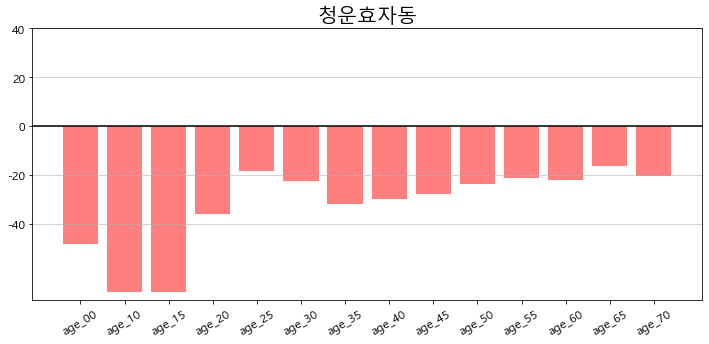

In [55]:
graph(crisis1, '청운효자동', '연령대구분값', '증감률')

<ipython-input-146-5926b8a0ad5c>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


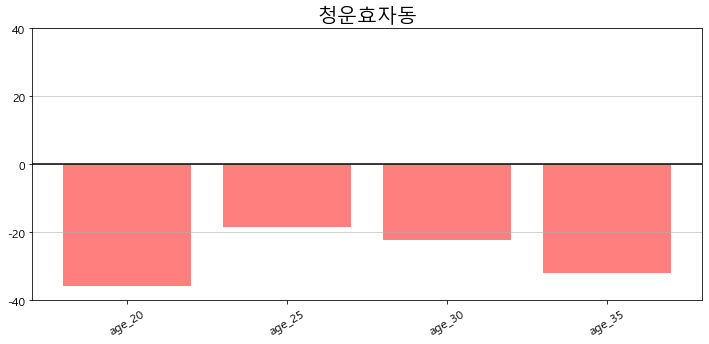

In [152]:
hyoja = crisis1.loc[[3,4,5,6]]
graph(hyoja, '청운효자동', '연령대구분값', '증감률')
plt.savefig('청운효자동')

In [56]:
name = '청운효자동'
standard_list = ['년', '성별코드', '연령대구분값']
agg_dict = {'인구수' : 'mean'}
merge = ['성별코드', '연령대구분값']
crisis1_2 = givegroup(name, standard_list, agg_dict, merge)

<ipython-input-48-e863905ef29d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_union['증감률'][j] = c


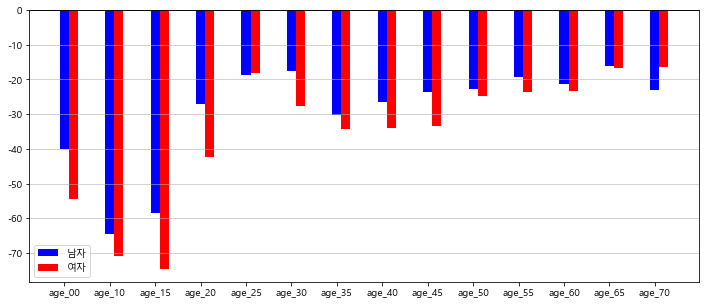

In [57]:
doubleBar(crisis1_2)

# '혜화동'

In [58]:
crisis2

,년_x,연령대구분값,인구수_x,년_y,인구수_y,증감률
0,2019,age_00,7,2020,4,-35
1,2019,age_10,30,2020,15,-50
2,2019,age_15,213,2020,80,-62
3,2019,age_20,568,2020,337,-41
4,2019,age_25,402,2020,327,-19
5,2019,age_30,235,2020,205,-13
6,2019,age_35,203,2020,162,-20
7,2019,age_40,176,2020,142,-19
8,2019,age_45,208,2020,172,-17
9,2019,age_50,186,2020,168,-10


<ipython-input-146-5926b8a0ad5c>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


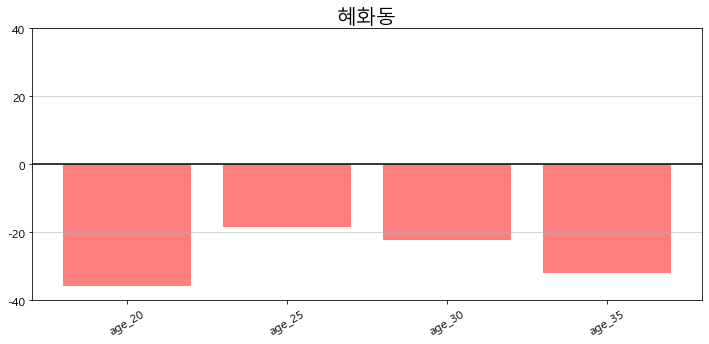

In [153]:
hyewha = crisis2.loc[[3,4,5,6]]
graph(hyoja, '혜화동', '연령대구분값', '증감률')
plt.savefig('혜화동')

<ipython-input-52-5ce47ed02fa8>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


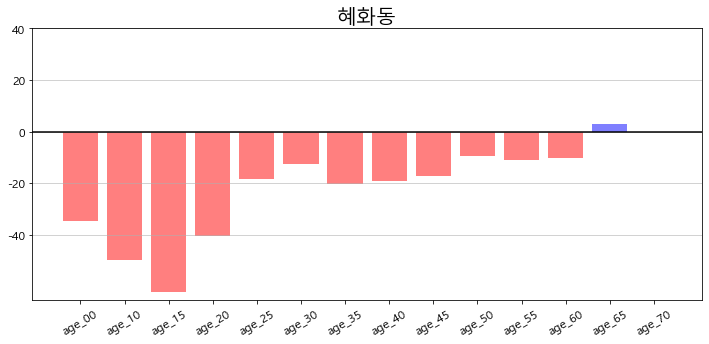

In [59]:
graph(crisis2,'혜화동',  '연령대구분값', '증감률')

In [60]:
name = '혜화동'
standard_list = ['년', '성별코드', '연령대구분값']
agg_dict = {'인구수' : 'mean'}
merge = ['성별코드', '연령대구분값']
crisis2_2 =givegroup(name, standard_list, agg_dict, merge)

<ipython-input-48-e863905ef29d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_union['증감률'][j] = c


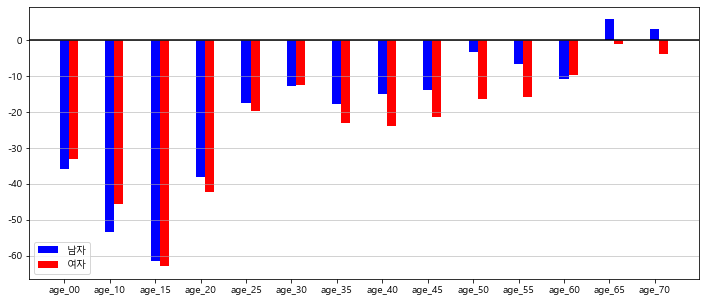

In [61]:
doubleBar(crisis2_2)

# '가회동'

In [62]:
crisis3

,년_x,연령대구분값,인구수_x,년_y,인구수_y,증감률
0,2019,age_00,3,2020,2,-40
1,2019,age_10,14,2020,5,-67
2,2019,age_15,44,2020,16,-62
3,2019,age_20,84,2020,62,-26
4,2019,age_25,135,2020,119,-12
5,2019,age_30,150,2020,134,-11
6,2019,age_35,148,2020,124,-16
7,2019,age_40,112,2020,98,-12
8,2019,age_45,126,2020,104,-18
9,2019,age_50,114,2020,91,-20


<ipython-input-52-5ce47ed02fa8>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


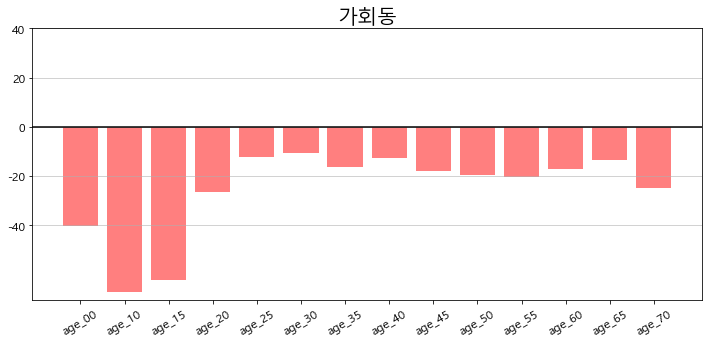

In [63]:
graph(crisis3,'가회동',  '연령대구분값', '증감률')

In [64]:
name = '가회동'
standard_list = ['년', '성별코드', '연령대구분값']
agg_dict = {'인구수' : 'mean'}
merge = ['성별코드', '연령대구분값']
crisis3_2 =givegroup(name, standard_list, agg_dict, merge)


<ipython-input-48-e863905ef29d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_union['증감률'][j] = c


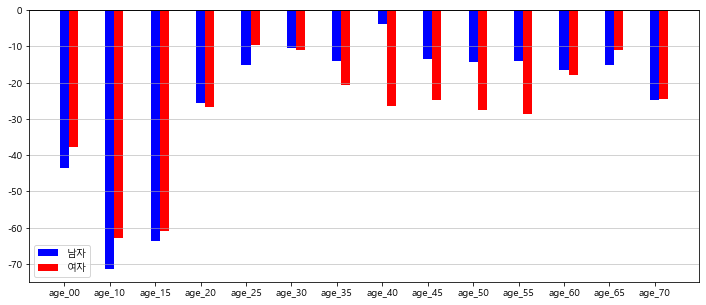

In [65]:
doubleBar(crisis3_2)

#  '창신1동'

In [66]:
crisis4

,년_x,연령대구분값,인구수_x,년_y,인구수_y,증감률
0,2019,age_00,4,2020,3,-27
1,2019,age_10,8,2020,5,-43
2,2019,age_15,43,2020,21,-51
3,2019,age_20,119,2020,95,-21
4,2019,age_25,192,2020,159,-17
5,2019,age_30,173,2020,141,-19
6,2019,age_35,176,2020,139,-21
7,2019,age_40,139,2020,112,-19
8,2019,age_45,178,2020,137,-23
9,2019,age_50,178,2020,152,-15


In [ ]:
changsin = crisis4.loc[[3,4,5,6]]
graph(hyoja, '창신1동', '연령대구분값', '증감률')
plt.savefig('창신1동')

<ipython-input-52-5ce47ed02fa8>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


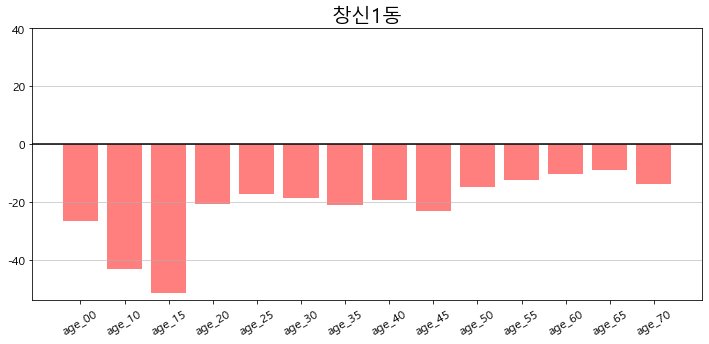

In [67]:
graph(crisis4,'창신1동',  '연령대구분값', '증감률')

In [68]:
name = '창신1동'
standard_list = ['년', '성별코드', '연령대구분값']
agg_dict = {'인구수' : 'mean'}
merge = ['성별코드', '연령대구분값']
crisis4_2 =givegroup(name, standard_list, agg_dict, merge)

<ipython-input-48-e863905ef29d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_union['증감률'][j] = c


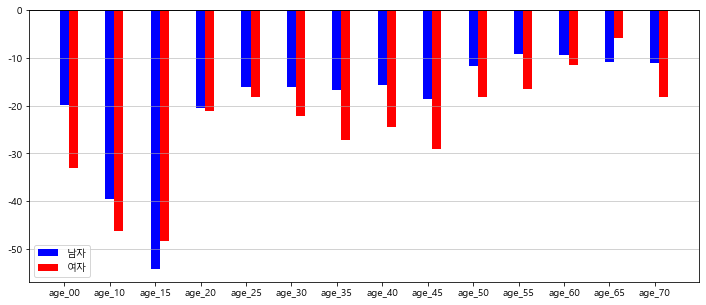

In [69]:
doubleBar(crisis4_2)

# '사직동'

In [70]:
crisis5

,년_x,연령대구분값,인구수_x,년_y,인구수_y,증감률
0,2019,age_00,9,2020,4,-53
1,2019,age_10,41,2020,13,-68
2,2019,age_15,104,2020,49,-53
3,2019,age_20,315,2020,226,-28
4,2019,age_25,530,2020,477,-10
5,2019,age_30,500,2020,451,-10
6,2019,age_35,526,2020,425,-19
7,2019,age_40,440,2020,366,-17
8,2019,age_45,498,2020,435,-13
9,2019,age_50,409,2020,375,-8


<ipython-input-52-5ce47ed02fa8>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


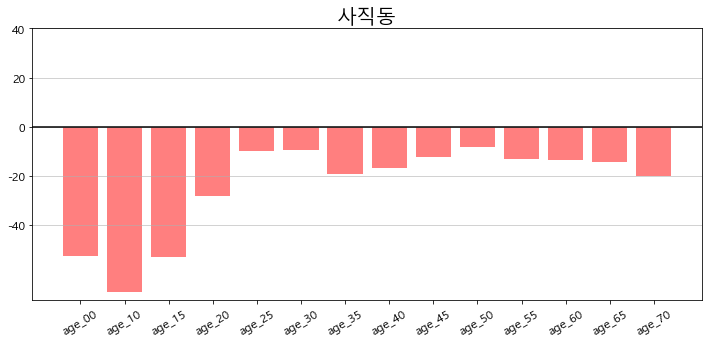

In [71]:
graph(crisis5, '사직동', '연령대구분값', '증감률')

In [72]:
name = '사직동'
standard_list = ['년', '성별코드', '연령대구분값']
agg_dict = {'인구수' : 'mean'}
merge = ['성별코드', '연령대구분값']
crisis5_2 =givegroup(name, standard_list, agg_dict, merge)

<ipython-input-48-e863905ef29d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_union['증감률'][j] = c


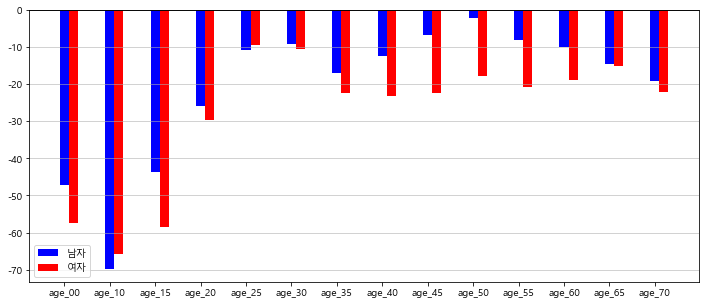

In [73]:
doubleBar(crisis5_2)

# 시작 5개

# '삼청동'

In [74]:
begin1

,년_x,연령대구분값,인구수_x,년_y,인구수_y,증감률
0,2019,age_00,3,2020,2,-22
1,2019,age_10,9,2020,5,-47
2,2019,age_15,18,2020,11,-38
3,2019,age_20,50,2020,55,9
4,2019,age_25,67,2020,85,25
5,2019,age_30,69,2020,87,26
6,2019,age_35,69,2020,75,9
7,2019,age_40,57,2020,66,16
8,2019,age_45,67,2020,75,12
9,2019,age_50,58,2020,69,18


In [118]:
abcd = begin1.loc[[3,4,5,6]]

In [119]:
abcd

,년_x,연령대구분값,인구수_x,년_y,인구수_y,증감률
3,2019,age_20,50,2020,55,9
4,2019,age_25,67,2020,85,25
5,2019,age_30,69,2020,87,26
6,2019,age_35,69,2020,75,9


<ipython-input-146-5926b8a0ad5c>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


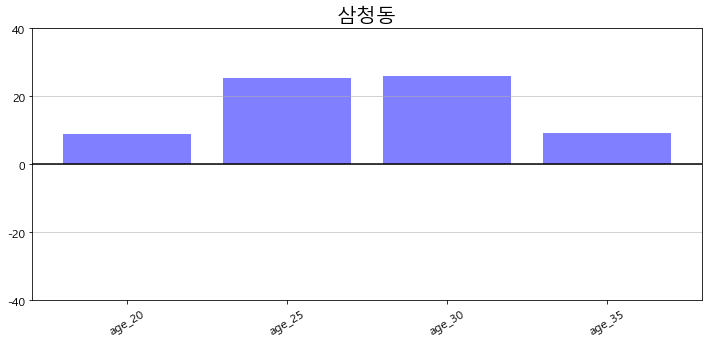

In [150]:
graph(abcd, '삼청동', '연령대구분값', '증감률')
plt.savefig('삼청동', dpi = 300)

<ipython-input-52-5ce47ed02fa8>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


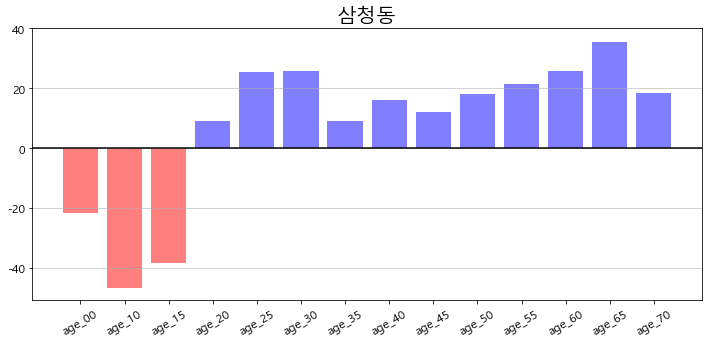

In [75]:
graph(begin1, '삼청동', '연령대구분값', '증감률')

In [76]:
name = '삼청동'
standard_list = ['년', '성별코드', '연령대구분값']
agg_dict = {'인구수' : 'mean'}
merge = ['성별코드', '연령대구분값']
begin1_2 =givegroup(name, standard_list, agg_dict, merge)

<ipython-input-48-e863905ef29d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_union['증감률'][j] = c


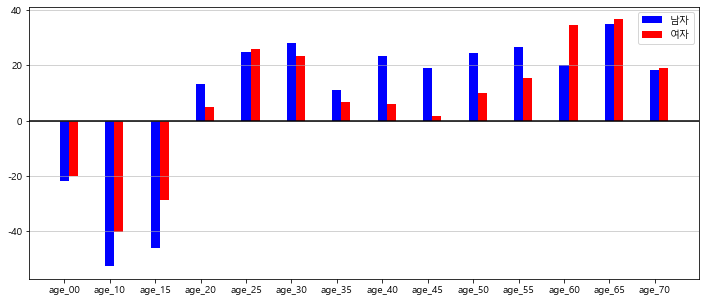

In [77]:
doubleBar(begin1_2)

# '창신2동'

In [78]:
begin2

,년_x,연령대구분값,인구수_x,년_y,인구수_y,증감률
0,2019,age_00,2,2020,2,-14
1,2019,age_10,6,2020,5,-13
2,2019,age_15,16,2020,13,-20
3,2019,age_20,36,2020,38,5
4,2019,age_25,36,2020,43,18
5,2019,age_30,30,2020,35,15
6,2019,age_35,30,2020,31,3
7,2019,age_40,26,2020,28,6
8,2019,age_45,45,2020,41,-9
9,2019,age_50,42,2020,48,15


<ipython-input-52-5ce47ed02fa8>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


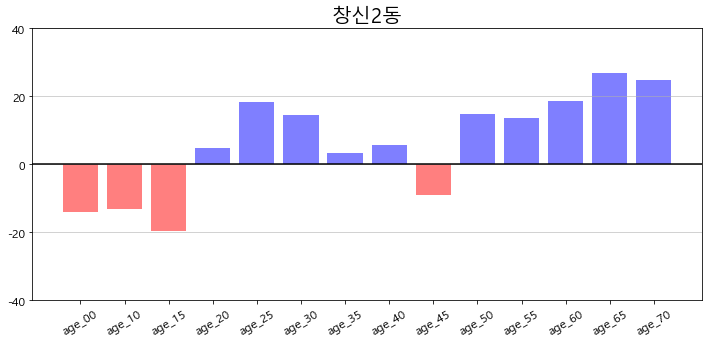

In [79]:
graph(begin2,'창신2동', '연령대구분값', '증감률')

In [80]:
name = '창신2동'
standard_list = ['년', '성별코드', '연령대구분값']
agg_dict = {'인구수' : 'mean'}
merge = ['성별코드', '연령대구분값']
begin2_2 =givegroup(name, standard_list, agg_dict, merge)

<ipython-input-48-e863905ef29d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_union['증감률'][j] = c


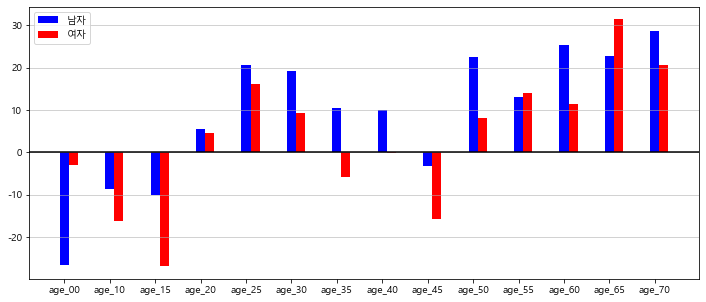

In [81]:
doubleBar(begin2_2)

# '이화동'

In [82]:
begin3

,년_x,연령대구분값,인구수_x,년_y,인구수_y,증감률
0,2019,age_00,7,2020,5,-30
1,2019,age_10,34,2020,16,-53
2,2019,age_15,123,2020,68,-44
3,2019,age_20,408,2020,349,-15
4,2019,age_25,485,2020,540,11
5,2019,age_30,337,2020,419,24
6,2019,age_35,300,2020,360,20
7,2019,age_40,240,2020,274,14
8,2019,age_45,276,2020,314,14
9,2019,age_50,251,2020,297,18


In [121]:
iwha = begin3.loc[[3,4,5,6]]

<ipython-input-146-5926b8a0ad5c>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


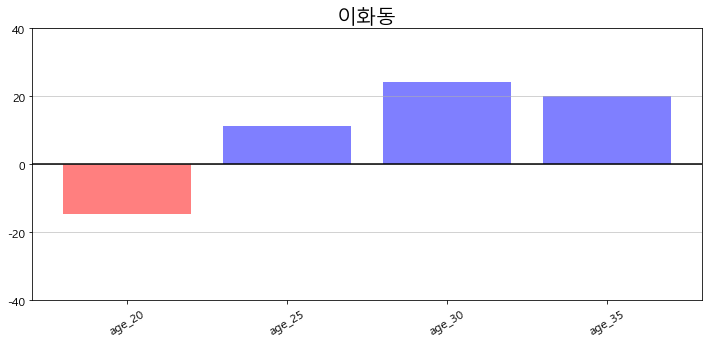

In [149]:
graph(iwha, '이화동', '연령대구분값', '증감률')
plt.savefig('이화동', dpi = 300)

<ipython-input-52-5ce47ed02fa8>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


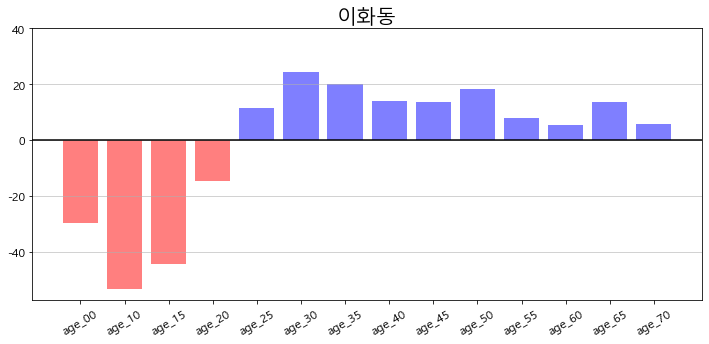

In [83]:
graph(begin3, '이화동','연령대구분값', '증감률')

In [84]:
name = '이화동'
standard_list = ['년', '성별코드', '연령대구분값']
agg_dict = {'인구수' : 'mean'}
merge = ['성별코드', '연령대구분값']
begin3_2 =givegroup(name, standard_list, agg_dict, merge)

<ipython-input-48-e863905ef29d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_union['증감률'][j] = c


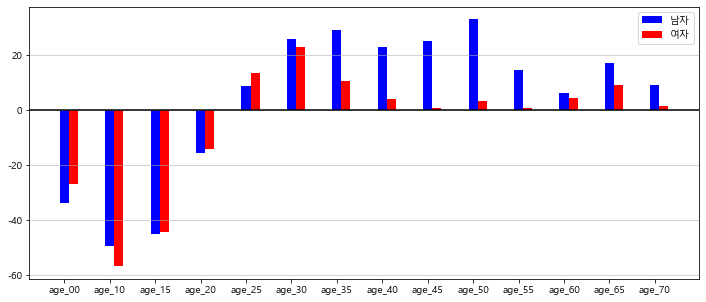

In [85]:
doubleBar(begin3_2)

# '숭인2동'

In [86]:
begin4

,년_x,연령대구분값,인구수_x,년_y,인구수_y,증감률
0,2019,age_00,3,2020,3,2
1,2019,age_10,8,2020,8,-6
2,2019,age_15,50,2020,30,-39
3,2019,age_20,122,2020,123,1
4,2019,age_25,189,2020,202,7
5,2019,age_30,171,2020,175,2
6,2019,age_35,176,2020,175,-1
7,2019,age_40,146,2020,151,3
8,2019,age_45,180,2020,183,1
9,2019,age_50,179,2020,194,8


<ipython-input-52-5ce47ed02fa8>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


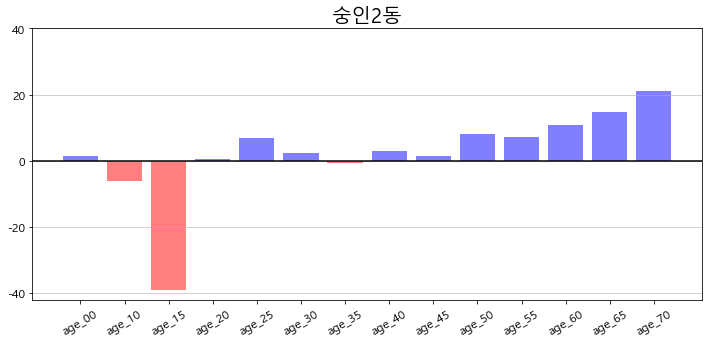

In [87]:
graph(begin4, '숭인2동','연령대구분값', '증감률')

In [88]:
name = '숭인2동'
standard_list = ['년', '성별코드', '연령대구분값']
agg_dict = {'인구수' : 'mean'}
merge = ['성별코드', '연령대구분값']
begin4_2 =givegroup(name, standard_list, agg_dict, merge)

<ipython-input-48-e863905ef29d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_union['증감률'][j] = c


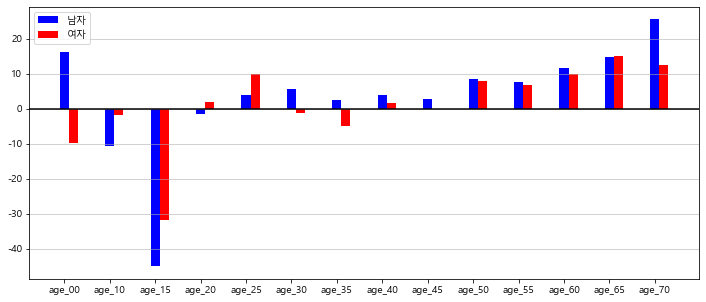

In [89]:
doubleBar(begin4_2)

# '부암동'

In [90]:
begin5

,년_x,연령대구분값,인구수_x,년_y,인구수_y,증감률
0,2019,age_00,4,2020,5,5
1,2019,age_10,16,2020,14,-9
2,2019,age_15,86,2020,43,-50
3,2019,age_20,152,2020,107,-30
4,2019,age_25,146,2020,163,12
5,2019,age_30,142,2020,158,11
6,2019,age_35,173,2020,175,1
7,2019,age_40,159,2020,164,4
8,2019,age_45,203,2020,210,4
9,2019,age_50,195,2020,221,13


In [138]:
buam

,년_x,연령대구분값,인구수_x,년_y,인구수_y,증감률
3,2019,age_20,152,2020,107,-30
4,2019,age_25,146,2020,163,12
5,2019,age_30,142,2020,158,11
6,2019,age_35,173,2020,175,1


<ipython-input-146-5926b8a0ad5c>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


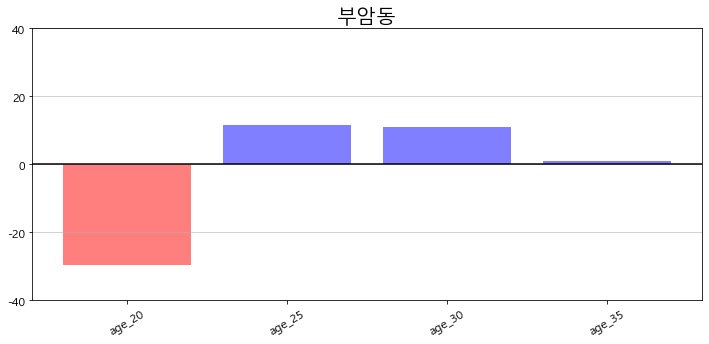

In [148]:
buam = begin5.loc[[3,4,5,6]]
graph(buam, '부암동', '연령대구분값', '증감률')
plt.savefig('부암동', dpi = 300)

In [146]:
def graph(data, name, x, y): # xlabel : 성별, 연령대 등/ ylabel : 증감률
    xlabel = data[x]
    ylabel = data[y]
    plt.figure(figsize = (12,5))
    colors = ['red' if (y<0) else 'blue' for y in ylabel] # 0 미만이면 빨강, 0 이상이면 파랑
    plt.bar(range(len(data)), ylabel, color = colors, alpha = 0.5)
    ax = plt.subplot()
    ax.set_xticks(range(len(data)))
    ax.set_xticklabels(xlabel, rotation = 30, fontsize = 12)
    ax.set_yticks([40, 20,0,-20, -40])
    ax.set_yticklabels([40, 20, 0, -20, -40], fontsize = 12)
    plt.axhline( y = 0, color = 'black')
    plt.title(name, fontsize = 20)
    plt.grid(axis = 'y', alpha = 0.7)


<ipython-input-130-5926b8a0ad5c>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


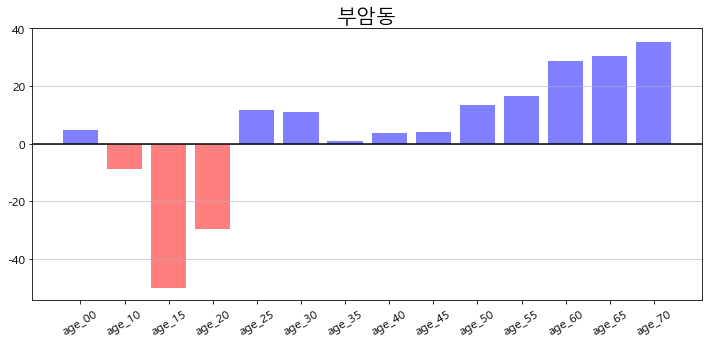

In [137]:
graph(begin5, '부암동','연령대구분값', '증감률')
plt.show()

In [92]:
name = '부암동'
standard_list = ['년', '성별코드', '연령대구분값']
agg_dict = {'인구수' : 'mean'}
merge = ['성별코드', '연령대구분값']
begin5_2 =givegroup(name, standard_list, agg_dict, merge)
begin5_2

<ipython-input-48-e863905ef29d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_union['증감률'][j] = c


,년_x,성별코드,연령대구분값,인구수_x,년_y,인구수_y,증감률
0,2019,F,age_00,5,2020,5,-5
1,2019,F,age_10,16,2020,14,-17
2,2019,F,age_15,105,2020,47,-56
3,2019,F,age_20,162,2020,111,-31
4,2019,F,age_25,117,2020,148,26
5,2019,F,age_30,114,2020,129,14
6,2019,F,age_35,131,2020,137,5
7,2019,F,age_40,117,2020,121,3
8,2019,F,age_45,161,2020,159,-1
9,2019,F,age_50,154,2020,177,15


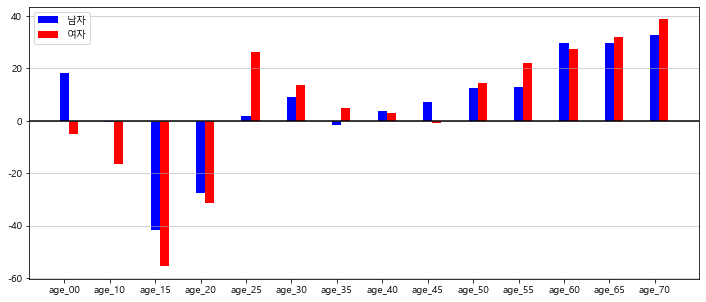

In [93]:
doubleBar(begin5_2)

# 전체 년/연령대 인구차이
### 신기하게 생각과는 다르게 25세 미만 아이들은 감소하였고 25세 이상으로는 다 증가하였음. 
### 특히 30세, 60세 이상 인구들이 10% 이상 증가함
### 또, 20세 이하에서 큰 폭으로 감소함

In [94]:
x = df_pop.groupby(['년', '연령대구분값'], as_index = False)['인구수'].sum()
x1 = x[:13]
x2 = x[14:]
x3 = pd.merge(x1, x2, on = '연령대구분값')

x3['증감률'] = ''

for i in range(len(x3)):
    a = x3['인구수_x'][i]
    b = x3['인구수_y'][i]
    c = (b-a)/a*100
    x3['증감률'][i] = c
all_year_age = x3
all_year_age

<ipython-input-94-12680969d51e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x3['증감률'][i] = c


,년_x,연령대구분값,인구수_x,년_y,인구수_y,증감률
0,2019,age_00,220719,2020,163202,-26
1,2019,age_10,1018001,2020,554500,-46
2,2019,age_15,3610170,2020,2056014,-43
3,2019,age_20,10048211,2020,8809205,-12
4,2019,age_25,13242209,2020,14305749,8
5,2019,age_30,11054825,2020,12198591,10
6,2019,age_35,11218327,2020,11481550,2
7,2019,age_40,9468732,2020,9742303,3
8,2019,age_45,11267552,2020,11605025,3
9,2019,age_50,10330240,2020,11264407,9


<ipython-input-52-5ce47ed02fa8>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


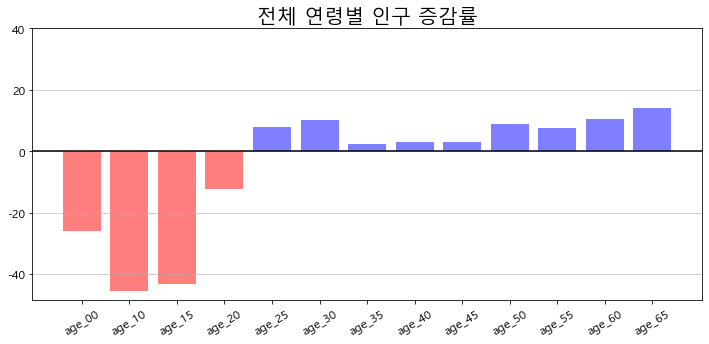

In [95]:
graph(all_year_age, '전체 연령별 인구 증감률','연령대구분값', '증감률')

In [96]:
# all_year_age.to_excel('전체 연령대별 인구 증감률.xlsx')

# 앞에서는 모든 시간대의 인구들을 포함시켰지만
# 우리가 알고 싶은 인구는 출퇴근 인구가 아닌 놀러오는 인구들. 즉 점심시간대, 저녁시간대 인구들을 한번 따로 보겠다

In [97]:
df_pop.head(5)

,24시간코드,성별코드,연령대구분값,행정동번호,인구수,날짜,요일,년,월,일
0,0,M,age_65,11110710,37,2019-04-01,월,2019,4,1
1,1,F,age_35,11110700,61,2019-04-01,월,2019,4,1
2,5,F,age_45,11110580,58,2019-04-01,월,2019,4,1
3,7,F,age_55,11110550,137,2019-04-01,월,2019,4,1
4,8,M,age_70,11110700,66,2019-04-01,월,2019,4,1


### 점심시간 : 10시 ~ 3시 / 저녁시간 : 6시 ~ 9시으로 설정

In [98]:
timezone = [10, 11, 12, 13, 14, 15, 18, 19, 20, 21]

In [99]:
df_time = df_pop[df_pop['24시간코드'].isin(timezone)]

In [100]:
df_time['24시간코드'].value_counts()

15    61731
14    61720
18    61654
13    61590
19    61487
12    61407
20    61345
11    61267
21    61177
10    61162
Name: 24시간코드, dtype: int64

In [101]:
df_time_admin = df_time.groupby(['년','행정동번호'], as_index = False)['인구수'].mean()
df_time_admin

,년,행정동번호,인구수
0,2019,11110515,186
1,2019,11110530,446
2,2019,11110540,65
3,2019,11110550,165
4,2019,11110560,204
5,2019,11110570,88
6,2019,11110580,174
7,2019,11110600,122
8,2019,11110615,893
9,2019,11110630,340


In [102]:
df_time_admin19 = df_time_admin[:17]
df_time_admin20 = df_time_admin[17:]
df_time_admin2 = pd.merge(df_time_admin19, df_time_admin20, on= '행정동번호')

In [103]:
df_time_admin2.head(3)

,년_x,행정동번호,인구수_x,년_y,인구수_y
0,2019,11110515,186,2020,134
1,2019,11110530,446,2020,372
2,2019,11110540,65,2020,75


In [104]:
def plusminus(x, y):
    return (y-x)/x * 100
df_time_admin2['증감률'] = ''
for i in range(len(df_year_admin2)):
    x = df_time_admin2.loc[i,'인구수_x']
    y = df_time_admin2.loc[i, '인구수_y']
    
    z = plusminus(x,y)
    df_time_admin2['증감률'][i] = z

<ipython-input-104-4b532c5097ae>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_admin2['증감률'][i] = z


In [105]:
df_time_admin2

,년_x,행정동번호,인구수_x,년_y,인구수_y,증감률
0,2019,11110515,186,2020,134,-28
1,2019,11110530,446,2020,372,-17
2,2019,11110540,65,2020,75,15
3,2019,11110550,165,2020,175,6
4,2019,11110560,204,2020,192,-6
5,2019,11110570,88,2020,79,-10
6,2019,11110580,174,2020,152,-13
7,2019,11110600,122,2020,99,-19
8,2019,11110615,893,2020,824,-8
9,2019,11110630,340,2020,305,-10


In [106]:
df_time_admin2.columns = ['년_x', '행정동코드', '인구수_x', '년_y', '인구수_y', '증감률'] # 컬럼명 재설정
df_time_admin2 = pd.merge(df_time_admin2, pop_info, on = '행정동코드') 
df_time_admin2.drop(['기준일자', '광역시도명', '시군구명'], axis = 1, inplace = True)
df_time_admin2 = df_time_admin2[[ '행정동명', '행정동코드', '년_x', '인구수_x', '년_y', '인구수_y', '증감률' ]]
df_time_admin2

,행정동명,행정동코드,년_x,인구수_x,년_y,인구수_y,증감률
0,청운효자동,11110515,2019,186,2020,134,-28
1,사직동,11110530,2019,446,2020,372,-17
2,삼청동,11110540,2019,65,2020,75,15
3,부암동,11110550,2019,165,2020,175,6
4,평창동,11110560,2019,204,2020,192,-6
5,무악동,11110570,2019,88,2020,79,-10
6,교남동,11110580,2019,174,2020,152,-13
7,가회동,11110600,2019,122,2020,99,-19
8,종로1.2.3.4가동,11110615,2019,893,2020,824,-8
9,종로5.6가동,11110630,2019,340,2020,305,-10


In [107]:
# df_time_admin2.to_csv('행정동별 인구수 증감률.csv')

<ipython-input-52-5ce47ed02fa8>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


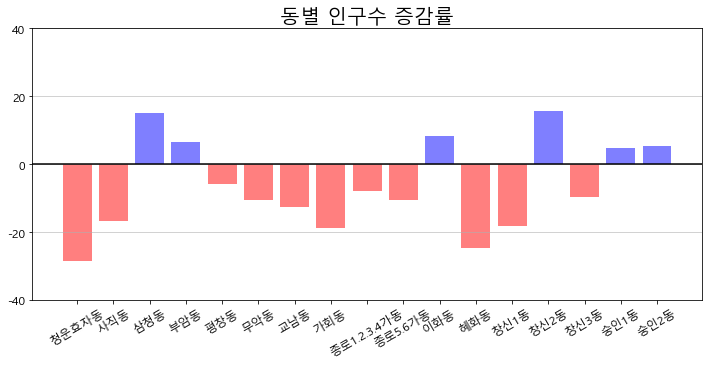

In [108]:
graph(df_time_admin2, '동별 인구수 증감률','행정동명', '증감률')

In [109]:
# df_time_admin2.to_excel('동별 인구수 비교(점심,저녁시간에만).xlsx')

# 이제 시간대별로 변화를 한번 보겠다

In [110]:
df_per_time = df_pop.groupby(['년', '24시간코드'], as_index = False)['인구수'].mean()
df_per_time1 = df_per_time[:24]
df_per_time2 = df_per_time[24:]
df_per_time = pd.merge(df_per_time1, df_per_time2, on = '24시간코드')

def plusminus(x, y): # 증감률 컬럼 추가
    return (y-x)/x * 100
df_per_time['증감률'] = ''
for i in range(len(df_per_time)):
    x = df_per_time.loc[i,'인구수_x']
    y = df_per_time.loc[i, '인구수_y']
    
    z = plusminus(x,y)
    df_per_time['증감률'][i] = z

<ipython-input-110-e46847e75cd3>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_per_time['증감률'][i] = z


In [111]:
df_per_time

,년_x,24시간코드,인구수_x,년_y,인구수_y,증감률
0,2019,0,73,2020,68,-7
1,2019,1,42,2020,38,-10
2,2019,2,36,2020,29,-21
3,2019,3,26,2020,24,-8
4,2019,4,30,2020,29,-5
5,2019,5,49,2020,45,-8
6,2019,6,77,2020,72,-6
7,2019,7,133,2020,127,-5
8,2019,8,196,2020,181,-7
9,2019,9,195,2020,179,-8


In [112]:
def graph2(data, name, x, y): # xlabel : 성별, 연령대 등/ ylabel : 증감률
    xlabel = data[x]
    ylabel = data[y]
    plt.figure(figsize = (12,5))
    colors = ['red' if (y<0) else 'blue' for y in ylabel] # 0 미만이면 빨강, 0 이상이면 파랑
    plt.bar(range(len(data)), ylabel, color = colors, alpha = 0.5)
    ax = plt.subplot()
    ax.set_xticks(range(len(data)))
    ax.set_xticklabels(xlabel, rotation = 30, fontsize = 12)
    ax.set_yticks([0,-10, -20])
    ax.set_yticklabels([0, -10, -20], fontsize = 12)
    plt.axhline( y = 0, color = 'black')
    plt.title(name, fontsize = 20)
    plt.grid(axis = 'y', alpha = 0.7)
    plt.show()

<ipython-input-113-c31817169857>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


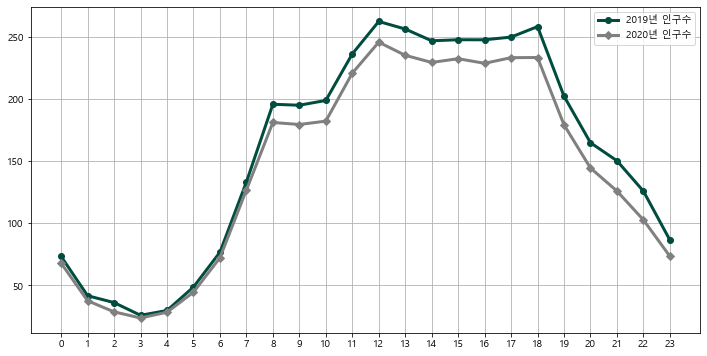

In [113]:
plt.figure(figsize = (12,6))
plt.plot(df_per_time['인구수_x'], label = '2019년 인구수', color = '#004c3f', linewidth = 3, marker = 'o')
plt.plot(df_per_time['인구수_y'], label = '2020년 인구수', color = 'grey', linewidth = 3, marker = 'D')
plt.legend()
plt.grid()
ax = plt.subplot()
ax.set_xticks(range(len(df_per_time)))
ax.set_xticklabels(df_per_time['24시간코드'])
# plt.savefig('20192020 시간대별 인구 비교.png')
plt.show()

In [114]:
df_per_time

,년_x,24시간코드,인구수_x,년_y,인구수_y,증감률
0,2019,0,73,2020,68,-7
1,2019,1,42,2020,38,-10
2,2019,2,36,2020,29,-21
3,2019,3,26,2020,24,-8
4,2019,4,30,2020,29,-5
5,2019,5,49,2020,45,-8
6,2019,6,77,2020,72,-6
7,2019,7,133,2020,127,-5
8,2019,8,196,2020,181,-7
9,2019,9,195,2020,179,-8


<ipython-input-112-1ff3cc4bf7a8>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


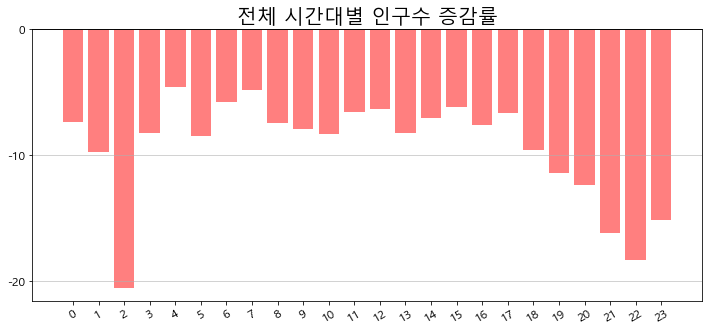

In [115]:
graph2(df_per_time, '전체 시간대별 인구수 증감률','24시간코드', '증감률')

In [116]:
# df_per_time.to_excel('시간대별 인구 증감률.xlsx')